In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

from keras.datasets import mnist
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

- Keras library is a deep learning library used for training the model

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Data analysis

In [3]:
print("Shape of X_train: %s" %(str(X_train.shape)))
print("Shape of y_train: %s" %(str(y_train.shape)))
print("Shape of X_test: %s" %(str(X_test.shape)))
print("Shape of y_test: %s" %(str(y_test.shape)))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


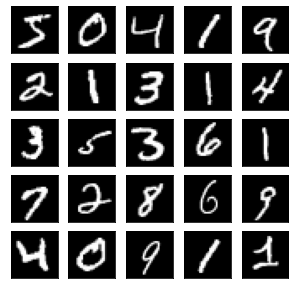

In [4]:
#Display 5 x 5 images of examples
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
plt.show()

In [5]:
#Normalize the images
X_train = X_train / 255
X_test = X_test / 255

In [6]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='softmax'))   #Final output for probability

    model.compile(Adam(learning_rate=0.01),
                loss='sparse_categorical_crossentropy', #loss function
               metrics=['accuracy'])
    return model


In [7]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
_________________________________________________________________


## Training using 'history' 

In [8]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, 
                    verbose=1, shuffle=1)
                    

Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 0.4282 - accuracy: 0.8694 - val_loss: 0.1960 - val_accuracy: 0.9438
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2374 - accuracy: 0.9309 - val_loss: 0.1827 - val_accuracy: 0.9477
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2122 - accuracy: 0.9379 - val_loss: 0.1827 - val_accuracy: 0.9468
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1983 - accuracy: 0.9411 - val_loss: 0.1760 - val_accuracy: 0.9513
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.1886 - accuracy: 0.9431 - val_loss: 0.1726 - val_accuracy: 0.9482
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.1775 - accuracy: 0.9466 - val_loss: 0.1577 - val_accuracy: 0.9527
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1740 - accuracy: 0.9485 - val_loss: 0.1967 - val_accuracy: 0.9468
Epoch 

Text(0.5, 0, 'epoch')

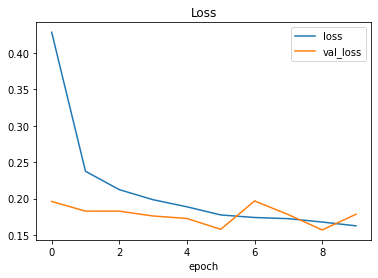

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

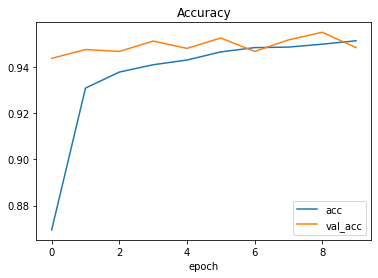

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

# Predict image

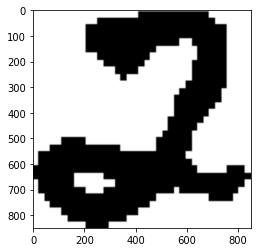

In [13]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)

plt.imshow(img)

(28, 28)


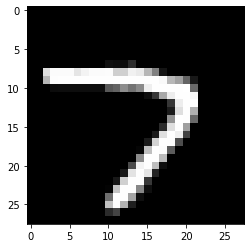

In [36]:
#Use the trained model to predict a single image
img = X_test[70]
print(img.shape)
plt.imshow(img, cmap='gray')

In [37]:
# Add image into a batch where it's the only member
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [38]:
#Normalize image before predicting
#X_test is already normalized

In [39]:
print(model.predict(img))  #Gives probability for full 10 classes
print(np.argmax(model.predict(img)))      #Find max value in array and print its index

[[6.3657074e-12 1.7059164e-10 7.9104380e-04 1.1314904e-05 1.6839801e-12
  5.6156985e-10 9.3150150e-21 9.9919766e-01 3.4482437e-09 3.8717748e-10]]
7
